# Olá gente, tudo bem com vocês?
Bom, esse é meu primeiro projeto de NLP, decide fazer quando em uma aula de português me foi apresentado o livro "O quarto do despejo" de Carolina Maria de Jesus. Por conta da sua história, na hora eu pensei que seria um ótimo livro para iniciar meus estudos em NLP.

Uma breve resumo do livro:

O livro reproduz o diário de Carolina de Jesus, em que ela narra o seu dia a dia nas comunidades pobres da cidade de São Paulo. Em seu relato, ela descreve a dor, o sofrimento, a fome e as angústias dos favelados e mudanças pelas quais passavam as favelas neste momento. Onde perdem seu caracter de moradia gratuita a propriedades privadas para renda, administradas pelos nordestinos recém chegados a São Paulo. Seu texto é considerado um dos marcos da escrita feminina no Brasil.

Dessa forma, Carolina de Jesus utiliza de uma linguagem objetiva e marcada pela oralidade, retratando assim sua realidade, uma vez que faz parte do seu cotidiano e nele está inserida.

Com uma tiragem inicial de dez mil exemplares que se esgotou em apenas uma semana, já foi traduzido para mais de treze idiomas desde o seu lançamento. O diário descreve as vivências da autora no período de 1955 a 1960.

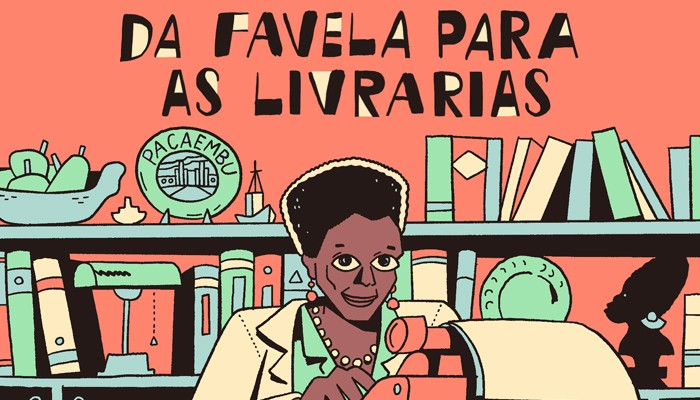



---



Como me foi disponibilizado o pdf do livro, eu tive que fazer tratar o pdf e para isso eu achei o pacote [pymupdf](https://pymupdf.readthedocs.io/en/latest/) do python





In [ ]:
pip install pymupdf

     |████████████████████████████████| 6.4 MB 2.6 MB/s 


Importo a biblioteca como fitz e começo abrindo o arquivo pdf






In [ ]:
import fitz

---
```
for page in range(9, 180):
```
Aqui eu percebi que os relatos começam a partir da página 9, pois no inicio tem agradecimentos e outras informações que para a análise seriam irrelevantes. Em seguida coloco 180 que é até onde vai os relatos, achei esse número testando até achar a última página.


In [ ]:
with fitz.open("/content/quarto_do_despejo.pdf") as pdf:
  texto = ""
  for page in range(9, 180):
    texto += pdf.getPageText(page).strip()

In [ ]:
print(texto)

In [ ]:
# Aqui eu salvo o texto em txt
with open('quarto_do_despejo.txt', 'w') as livro:
  livro.write(texto)

Importando as bibliotecas de nlp

In [ ]:
import nltk
import re
from nltk.stem import WordNetLemmatizer

from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image

# Instalando os arquivos dentro da biblioteca nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Stopwords são palavras que não trazem valor na análise, como artigos, preposições e etc.

Quando formos fazer uma análise de frequência, teria muitos "a", "o", "para" e muito mais. Isso atrapalharia a análise.

Por conta disso, tiramos as stopwords

In [ ]:
def pre_processamento(texto):
  # Aqui eu pego somente o que é letra dentro do texto, tirando pontuações e outros sinais, e coloco tudo em minúsculo
  letras_min = re.findall(r'\b[A-zÀ-úü]+\b', texto.lower())
  
  # Aqui fica o tratamento com stopwords
  stopwords = nltk.corpus.stopwords.words('portuguese')
  stopwords.append('pra') # "pra" é uma palavra que não está na lista de stopwords no português, por isso adcionamos
  stopwords.append('porque') # "porque" é uma palavra que não está na lista de stopwords no português e é falada bastante no livro
  stop = set(stopwords)
  sem_stopwords = [word for word in letras_min if word not in stop]

  texto_limpo = ' '.join(sem_stopwords)

  return texto_limpo

In [ ]:
# Lendo o arquivo
with open('quarto_do_despejo.txt') as texto:
   livro = texto.read()

Uma coisa importante a se fazer é tokenizar o texto.

tokenizar é dividir o texto por palavra.

Exemplo: Eu amo meu gato

Tokenizando essa frase ficaria, ["Eu", "amo", "meu", "gato"]

In [ ]:
# Fazendo o pre processamento no texto
livro_pp = pre_processamento(livro)

tokens = nltk.tokenize.word_tokenize(livro_pp, language='portuguese')

Aqui vamos fazer um gráfico de frequência.

A função basicamente vai contar quantas vezes cada palavra aparece.

20 palavras mais frequentes:
[('disse', 334), ('favela', 259), ('filhos', 189), ('senhor', 174), ('vera', 171), ('dona', 143), ('cruzeiros', 138), ('dinheiro', 137), ('casa', 134), ('joão', 131)]


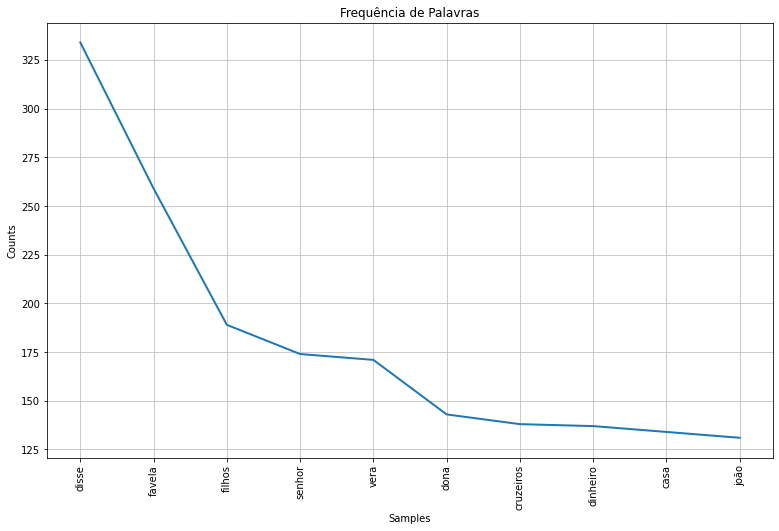

In [ ]:
fd = FreqDist(tokens)

print("20 palavras mais frequentes:")
print(fd.most_common(10))

# Plotando as 10 palavras mais citadas no texto
plt.figure(figsize = (13, 8))
fd.plot(10, title = "Frequência de Palavras")

Agora vamos pegar algumas informações do texto



In [ ]:
livro_infos = nltk.Text(tokens)

In [ ]:
# Essa função serve para nos mostrar em quais contextos determinada palavra aparece
livro_infos.concordance('favela')

Displaying 25 of 259 matches:
s latas lenha vinha pensando chegar favela vou encontrar novidades talvez d ro
gravida conta pavor destas mulheres favela tudo quer saber lingua pés galinha 
i formar carater unica coisa existe favela solidariedade veio peixeiro senhor 
s socegados invejo mulheres casadas favela levam vida escravas indianas casei 
nconciente álcool homens indolentes favela vasculhavam bolsos roubaram dinheir
eender vou escrever livro referente favela citar tudo aqui passa tudo fazem qu
 cato papel provando vivo residindo favela deus ajudar mudar daqui espero polí
sa tijolo dia hoje benefico rascoas favela vendo escrever sabe contra resolver
to anos cato papel desgosto residir favela durante dia jovens anos sentam gram
 d nair barros janela falei residia favela favela pior cortiço existe enchi do
 barros janela falei residia favela favela pior cortiço existe enchi dois saco
s batatas disse pudesse mudar desta favela impressão inferno sentei sol escrev
e cantando únicas hora

In [ ]:
livro_infos.concordance('fome')

Displaying 25 of 70 matches:
so pretendentes politica povo tolera fome preciso conhecer fome saber descrevê
ca povo tolera fome preciso conhecer fome saber descrevê la construindo circo 
l precisa ser dirigido pessoa passou fome fome professora passa fome aprende p
cisa ser dirigido pessoa passou fome fome professora passa fome aprende pensar
oa passou fome fome professora passa fome aprende pensar proximo crianças maio
rver caldo fiz batatas filhos sempre fome passam muita fome exigentes paladar 
atas filhos sempre fome passam muita fome exigentes paladar surgiu noite estre
maio lutava contra escravatura atual fome maio noite improvisam batucada deixa
esperar futuro leito campos jordão [ fome quero matar janio quero enforcaro ad
 [ cuidado sabiá perder gaiola gatos fome contempla aves gaiolas favelados gat
ntempla aves gaiolas favelados gatos fome deixei meditar ouvi voz padeiro olha
uir retornando primitividade conhece fome dizer escreve louco passa fome dizer
nhece fome dizer escrev

In [ ]:
# Usando a função ‘similar’ temos uma lista de palavras que tendem a ocorrer no mesmo contexto
livro_infos.similar('favela')

casa perto crianças sacos encontrei paulo lá aqui vim passa correndo
cidade sido trazer nesta frigorifico corri neste


Bigramas são palavras no texto que possuem um sentido único estando juntas, podendo até ocorrer separadas, mas com um sentido quando juntas.

Por exemplo, nomes compostos (João Alfredo, Maria Júlia) ou nomes de cidades (São Paulo, Rio de Janeiro, Nova Iorque)

In [ ]:
livro_infos.collocations()

josé carlos; catar papel; senhor manoel; deixei leito; aqui favela;
ganhei cruzeiros; dona julita; carregar agua; lavar roupas; radio
patrulha; quarto despejo; cheguei favela; varias pessoas; frei luiz;
leito horas; orlando lopes; buscar agua; vera eunice; graças deus;
soldado edison


Aqui fizemos um gráfico de dispersão.

Essa função serve para analisar a ocorrência das palavras ao longo de todo o texto.

**O que podemos tirar de informação?**

Bom, podemos ver que a palavra "fome" não aparece no início do livro, mas quando é citada fica até o final.

A autora cita bastante a filha vera, até mais que os outros dois irmãos josé e carlos.

A autora também fala bastante a palavra favela

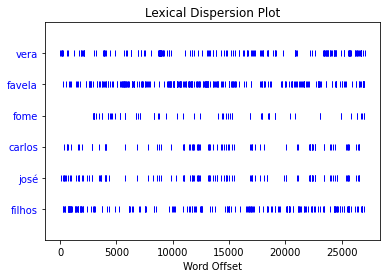

In [ ]:
palavras = ['vera','favela','fome','carlos','josé', 'filhos']
livro_infos.dispersion_plot(palavras)

---
Agora vamos fazer uma nuvem de palavras usando a biblioteca WordCloud.

Ao pesquisar Carolina de Jesus no google, apareceu aquela imagem do início do notebook que eu gostei muito, pois sua paleta de cores é linda. Por isso usaremos ela

In [ ]:
# Aqui transformamos a imagem em um array numpy
img = np.array(Image.open('/content/cmdj.jpg'))
# E aqui usamos a função ImageColor Generator para pegar cada cor de pixel
img_colors = ImageColorGenerator(img)

E finalmente fazemos a nuvem de palavras!!

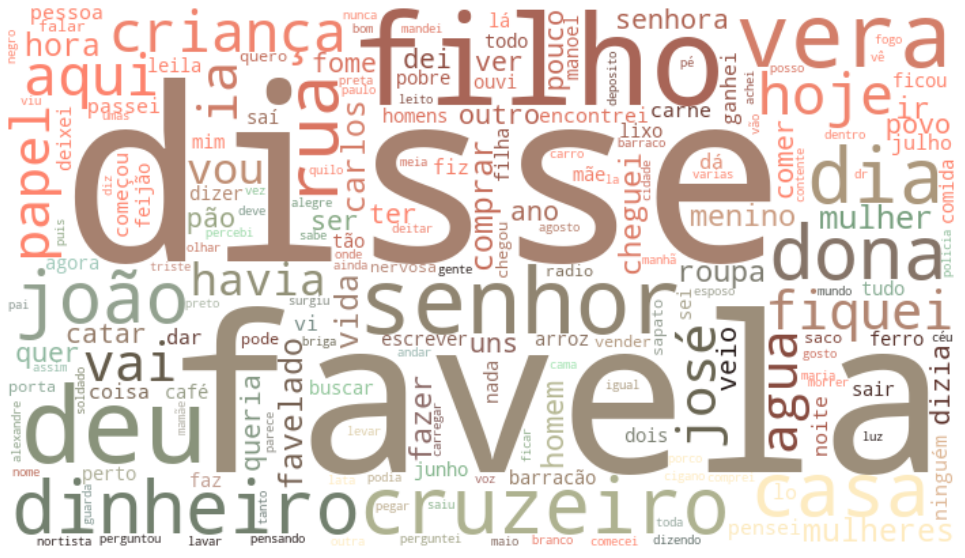

In [ ]:
text = " ".join(tokens)

wordcloud = WordCloud(background_color="white",width=700, height=400, collocations = False).generate(text)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud.recolor(color_func=img_colors), interpolation='bilinear')
plt.axis("off")
plt.savefig('qd_wordcloud.png')
plt.show()

Então gente, por hoje é isso, comecei meus estudo em nlp e gostei bastante, pretendo trazer mais depois.

Tchauuu :)